In [22]:
import diplib as dip
import cv2
import numpy as np

In [62]:
img = cv2.imread('data_r/cam1.tiff')
output = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
x1 = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,dp=1.2,minDist=1000, param1=200,param2=150,minRadius=100)

In [83]:
if x1 is not None:
    circles = np.round(x1[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(output, (x, y), r, (0, 255, 0), 10)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    
    cv2.imwrite('output1000.tiff', output)
    #cv2.imshow("output", np.hstack([img, output]))
    #cv2.waitKey(0)

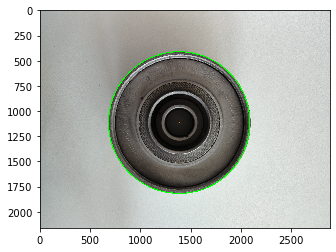

In [92]:
img = dip.ImageReadTIFF('output1000.tiff')
img.SetPixelSize(dip.PixelSize(1 * dip.Units("mm")))
img.Show()

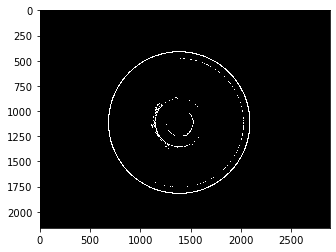

Scalar image:
    data type BIN
    sizes {2880, 2160} (2D)
    pixel size 1 mm x 1 mm
    strides {1, 2880}, tensor stride 1
    data pointer:   000002061A830040 (shared among 1 images)
    origin pointer: 000002061A830040



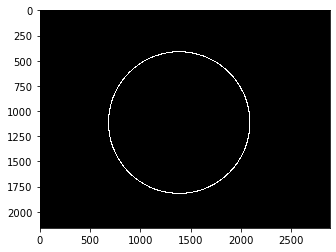

In [93]:
img2 = img(0) < 5
img2.Show()
print(img2)
lab = dip.Label(img2, minSize=10000)
lab.Show()

In [94]:
msr = dip.MeasurementTool.Measure(lab,img,['Size','Perimeter','Radius','Solidity'])
print(msr)

  |       Size |  Perimeter |                                            Radius |   Solidity | ConvexArea | 
- | ---------- | ---------- | ------------------------------------------------- | ---------- | ---------- | 
  |            |            |        Max |       Mean |        Min |     StdDev |            |            | 
  |      (mm²) |       (mm) |       (mm) |       (mm) |       (mm) |       (mm) |            |      (mm²) | 
- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | 
1 |  4.837e+04 |      4445. |      708.0 |      707.1 |      706.2 |     0.3298 |    0.03076 |  1.572e+06 | 

